<a href="https://colab.research.google.com/github/erikrowens/Codecademy/blob/main/BiodiversityInNationalParks_PortfolioProject/biodiversity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biodiversity in National Parks Portfolio Project
For this project, you will interpret data from the National Parks Service about endangered species in different parks.

You will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, you will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.

# Project Scope


*   Goals
  * What is the distribution of conservation_status for animals?
  * Are certain types of species more likely to be endangered?
  * Are the differences between species and their conservation status significant?
  * Which species were spotted the most at each park?
*   Data
  * We will use the *observations.csv* and *species_info.csv* files supplied from Codecademy.
*   Analysis
  * We will use tools suchs as numpy, pandas, matplotlib, and seaborne to explore, analyse, and visualise the data.
  * Once completed we will be able draw our conclusions based on our goals for the project.





# Initial Code
Library imports and method defintions

In [ ]:
#@title Code: Library Import
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tick
from matplotlib.ticker import FuncFormatter
import locale
locale.setlocale(locale.LC_ALL, '')

'en_US.UTF-8'

In [ ]:
#@title Code: Method Defitions
#I create a dictionary containing the dataframes so that I can loop on it
#for later user (like .head())
#Credit: https://stackoverflow.com/questions/44835358/pandas-list-of-dataframe-names
def getDataFramesAsDict():

  d = globals()
  #Original code
  dfDict = {}
  dfDict = {k: v for k, v in d.items() if isinstance(v, pd.DataFrame)}
  return dfDict

def reformat_large_tick_values(tick_val, pos):

    """
    Credit: Dan Friedman, https://dfrieds.com/data-visualizations/how-format-large-tick-values.html
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).

    I simlpy adapted the code to handle negactive values by copy/paste of 
    the block of code that handles positive values.
    """
    if tick_val < 0:
      if tick_val <= -1000000000000:
          val = round(tick_val/1000000000000, 1)
          new_tick_format = '-{:}T'.format(val)
      elif tick_val <= -1000000000:
          val = round(tick_val/1000000000, 1)
          new_tick_format = '-{:}B'.format(val)
      elif tick_val <= -1000000:
          val = round(tick_val/1000000, 1)
          new_tick_format = '-{:}M'.format(val)
      elif tick_val <= 1000:
          val = round(tick_val/1000, 1)
          new_tick_format = '-{:}K'.format(val)
      #elif tick_val < 1000:
          #new_tick_format = round(tick_val, 1)
      else:
          new_tick_format = tick_val
    else:  
      if tick_val >= 1000000000000:
          val = round(tick_val/1000000000000, 1)
          new_tick_format = '{:}T'.format(val)
      elif tick_val >= 1000000000:
          val = round(tick_val/1000000000, 1)
          new_tick_format = '{:}B'.format(val)
      elif tick_val >= 1000000:
          val = round(tick_val/1000000, 1)
          new_tick_format = '{:}M'.format(val)
      elif tick_val >= 1000:
          val = round(tick_val/1000, 1)
          new_tick_format = '{:}K'.format(val)
      elif tick_val < 1000:
          new_tick_format = round(tick_val, 1)
      else:
          new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

#Create a dataframe that will be set up as a grid
# as follows [conservation_status, scientific_name]
def gridDFBuilder(multiColumnGroupedDF, rowName, columnName, countCol):

  rowListSeries = getattr(grouped_multiple, rowName)
  columnListSeries = getattr(grouped_multiple, columnName)
  
  rowList= list(rowListSeries.unique())
  columnList = list(columnListSeries.unique())

  gridDF = pd.DataFrame(index=rowList)

  #Add columns as scientific_name
  for c in columnList:
    gridDF[c] = ''


  rowSeries = getattr(multiColumnGroupedDF, rowName)
  columnSeries = getattr(multiColumnGroupedDF, columnName)
  
  for r in rowList:
    l = []
    for c in columnList:
      result = multiColumnGroupedDF[(rowSeries == r) & (columnSeries == c)]
      if(len(result) > 0):
        newResult = getattr(result, countCol)
        gridDF.loc[r,c] = newResult.values[0]
      else:
        gridDF.loc[r,c] = 0

  return gridDF

#Method to calculate the values at -2, -1, 1, and 2 standard deviations
def calcDistribution(s: pd.Series):

  sampleMean = np.mean(s)
  sampleMedian = np.median(s)
  sampleStdDev = np.std(s)

  m2StdDev = round(sampleMean-(2*sampleStdDev))
  m1StdDev = round(sampleMean-(1*sampleStdDev))
  p1StdDev = round(sampleMean+(1*sampleStdDev))
  p2StdDev = round(sampleMean+(2*sampleStdDev))

  m2 = []
  m1 = []
  p1 = []
  p2 = []

  for value in s:
    if(value >= m1StdDev and value < sampleMean):
      m1.append(value)
    elif(value >= m2StdDev and value < sampleMean):
      m2.append(value)
    elif(value > sampleMean and value <= p1StdDev): 
      p1.append(value)
    elif(value > sampleMean and value <= p2StdDev): 
      p2.append(value)

  #print([m2StdDev, m1StdDev, sampleMean, p1StdDev, p2StdDev])
  distrib = {"m2StdDev": sum(m2), "m1StdDev": sum(m1), "p1StdDev": sum(p1),"p2StdDev": sum(p2)}

  return distrib



In [ ]:
#@title Code: Import Data
# Import data and setup dictionary listing the dataframes
#I append '_core' to tag these dataframes as my orignal dataframes
#that are used for analysis as opposed to temporary dataframes that
#are created throughout execution. This is necessarry since the list (dict)
#of dataframes is from globals
observationsDF_core = pd.read_csv('observations.csv')
speciesDF_core = pd.read_csv('species_info.csv')

# Inspect the data - Part 1, Tidiness
High level inspection for tidiness, variable type, etc.

In [ ]:
#@title Code: High Level Data Inspection (generic, independent of datasets)
# Rename columns if necessarry
#df.rename(columns={"": ""}, inplace=True)

dfDict = getDataFramesAsDict();

#Look at the data and its structure
for k, v in dfDict.items():
  splitK = k.split("_")
  if(len(splitK) > 1 and splitK[1] =='core'):
    print("Dataframe: "+k)
    print(v.info())
    print("\n")  
    print(v.head())
    print("\n\n")    


# Look for duplicate entries, NULL and NaN entries
print("*****Control for duplicates*****")
for k, v in dfDict.items():
  #The following two lines test to see if it is a 'core' dataframe for analysis
  splitK = k.split("_")
  if(len(splitK) > 1 and splitK[1] =='core'):
    print("\nDataframe: "+k+"\n")
    grouped = {}
    groupedDuplicates = {}
    grouped = v.groupby(v.columns.tolist(),as_index=False).size()
    groupedDuplicates = grouped[grouped['size'] > 1]
    print("*****List of duplicate entries*****")
    print(groupedDuplicates)

    print("*****Look for NA and NULL entries******")
    v[v.isna().any(axis=1)]
    #Do a quick check for entries that contain Null
    v[v.isnull().any(axis=1)]

Dataframe: observationsDF_core
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85



Dataframe: speciesDF_core
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823


In [ ]:
#@title Code: Convert values in speciesInfoDF_core.convservation_status
#Convert the nan values in speciesInfoDF_core to "None"
#The nan are instances of float instead of string so test for float
#as we should only have string values in this column
for v in speciesDF_core.values:
  if ( isinstance(v[3], float) ):
    v[3] = "None"

print(speciesDF_core.head(10))

  category  ... conservation_status
0   Mammal  ...                None
1   Mammal  ...                None
2   Mammal  ...                None
3   Mammal  ...                None
4   Mammal  ...                None
5   Mammal  ...                None
6   Mammal  ...                None
7   Mammal  ...  Species of Concern
8   Mammal  ...          Endangered
9   Mammal  ...          Endangered

[10 rows x 4 columns]


There are 5541 unique species in the species_info file.
There are 4 parks where observations occurred.
A total of 3,314,739 were recorded.


<Figure size 432x288 with 0 Axes>

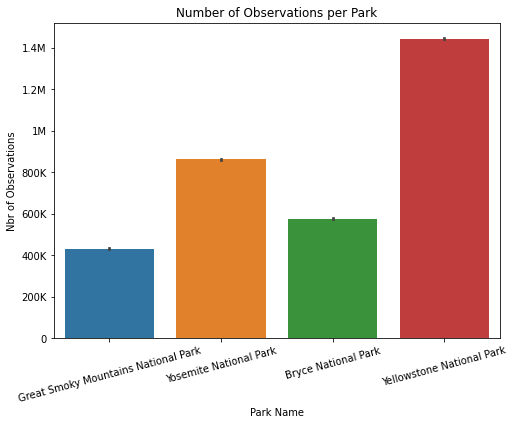

In [ ]:
#@title Code: High level data concerning data sets
uniqueParks = observationsDF_core.park_name.nunique()
uniqueSpecies = speciesDF_core.scientific_name.nunique()
totalObservations = observationsDF_core.observations.sum()
print("There are "+str(uniqueSpecies)+" unique species in the species_info file.")
print("There are "+str(uniqueParks)+" parks where observations occurred.")
print("A total of "+str(f'{totalObservations:n}')+" were recorded.")

plt.clf()
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(data=observationsDF_core, x='park_name', y='observations', estimator=sum)
plt.title("Number of Observations per Park")
plt.ylabel("Nbr of Observations")
plt.xlabel("Park Name")
plt.xticks(rotation=15)
plt.gcf().subplots_adjust(bottom=0.15)

ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

fig = plt.gcf()
plt.draw()
fig.savefig('observations_per_park.png', dpi=100, format='png')
plt.show()


#Observations of data - Part 1, Tidiness

* General observations
  * species_info: contains 4 columns and 5,824 entries
  * observations: contains 3 columns and 23,296 entries
  * the column "scientific_name" is common to both dataframes and could be used to join them together if required
  * There are no dates so we do not know the period that these observations took place
  * More than 3 million observations were recorded of 5,541 species in 4 parks.
* Duplicates
  * species_info does not contain ducplicates
  * observations contains duplicates of species, but it seems that these are observations for the sames species at different parks
* Misc
  * no null values are reported by pd.info() however *species_info.csv* does seem to have empty cells for the column *conservation_status* which show as "NaN". These have been converted to "None" as this is categorical data that we can use to classify and quantify later.

# Inspect the data - Part 2, Initial Analysis
Start to look at high level statistics such as mean, etc. and make some initial plot to help identify a direction for our analysis and/or answer the question that we posed ourselves in the project scope.

<Figure size 432x288 with 0 Axes>

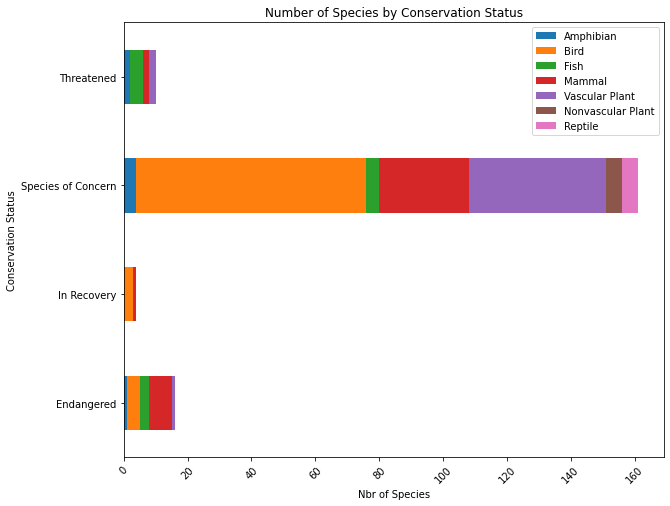

In [ ]:
#@title Code: Plot conservation status by species
#Filter out empty conservation_status
df = speciesDF_core[speciesDF_core.conservation_status != "None"]
#Count conserversation status by scientific name
grouped_multiple = df.groupby(['conservation_status', 'category']).agg({'category': ['count']})
#Without this line we don't get the unique() method
grouped_multiple.columns = ['nbrCatConvStat']
grouped_multiple = grouped_multiple.reset_index()

#Transerform our aggregated DF into a grid of (row=conservation_status, column=category)
#for use by pd.plot()
gridDF = gridDFBuilder(grouped_multiple, 'conservation_status',  'category', 'nbrCatConvStat')

fig, ax = plt.subplots()
plt.clf()
ax = gridDF.plot(kind='barh', figsize=(10,8), stacked=True)
plt.xticks(rotation=45)
plt.xlabel("Nbr of Species")
plt.ylabel("Conservation Status")
plt.title("Number of Species by Conservation Status")

plt.gcf().subplots_adjust(left=0.15)

fig = plt.gcf()
plt.draw()
fig.savefig("nbrSpecies_by_status_and_category.png", format="png")
plt.show()



# Observations of data - Part 2, Initial Analysis
* Species and Conservation Status
  * "Species of Concern" is the conservation status with by far the most number of species. This status has 7 categories of animals classified in it today. Birds, followed by Vascular Plants, and then Mammals are the top three categories of species.

# Data Analysis - A Deeper Dive

## What is the distribution of conservation_status for animals?

<Figure size 432x288 with 0 Axes>

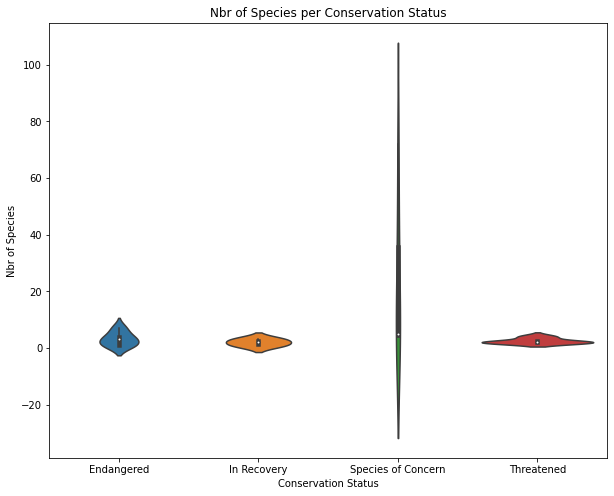

<Figure size 432x288 with 0 Axes>

In [ ]:
#@title Code: What is the distribution of conservation_status for animals?
#1. Plot a violin chart to get an initial impression

transposedGridDF = gridDF.transpose()
#print(transposedGridDF)

plt.clf()

fig, ax = plt.subplots(figsize=(10,8))
ax = sns.violinplot(data = grouped_multiple, x='conservation_status', y='nbrCatConvStat')
plt.title("Nbr of Species per Conservation Status")
plt.xlabel("Conservation Status")
plt.ylabel("Nbr of Species")

fig = plt.gcf()
plt.show()
plt.draw()
fig.savefig("distribution_status.png", format="png")

We can see that the consveration status "Species of Concern" merits firther exploration.

The data for consveration status by species is not a normal distribution since only 55.28% of the values are within 1 standard deviation of the mean.

Lets look at the conservation status 'Species of Concern.


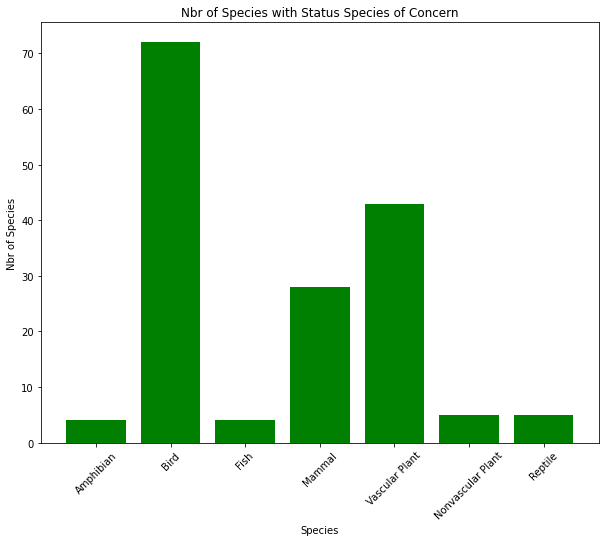

In [ ]:
#@title Code: Review the data for the conservation status "Species of Concern"
#2. Calculate the mean and median
#3. Further visualize with a histogram to visualize the sorted data

#This could may not be very 'pythonic', but since I already have the dataframe
#'gridDF', I will reuse it to calcute mean and median and plot the distribution.
x = list(gridDF.columns)
y = gridDF[gridDF.index == 'Species of Concern']
sampleMean = np.mean(y.values[0])
sampleMedian = np.median(y.values[0])
sampleStdDev = np.std(y.values[0])

#distrib = calcDistribution(pd.Series(y.values[0]))
distrib = calcDistribution(pd.Series(y.values[0]))

within1StdDev = distrib["m1StdDev"]+ distrib["p1StdDev"]
within2StdDev = within1StdDev + distrib["m2StdDev"]+distrib["p2StdDev"]

percent1StdDev = within1StdDev/sum(y.values[0])*100
percent2StdDev = within2StdDev/sum(y.values[0])*100

if(percent1StdDev < 68):
  print("The data for consveration status by species is not a normal distribution since only "+str("{0:.2f}%".format(percent1StdDev))+" of the values are within 1 standard deviation of the mean.")

print("\nLets look at the conservation status 'Species of Concern.")

y = y.values[0].tolist()

fig, ax = plt.subplots(figsize=(10,8))
plt.bar(x, y, color='green')
plt.xticks(rotation=45)
plt.title("Nbr of Species with Status Species of Concern")
plt.xlabel("Species")
plt.ylabel("Nbr of Species")

plt.gcf().subplots_adjust(bottom=0.15)

fig = plt.gcf()
plt.draw()
fig.savefig("nbrSpecies_per_category_for_stat_speciesOfConcern.png", format="png")
plt.show()

## Are certain types of species more likely to be endangered?

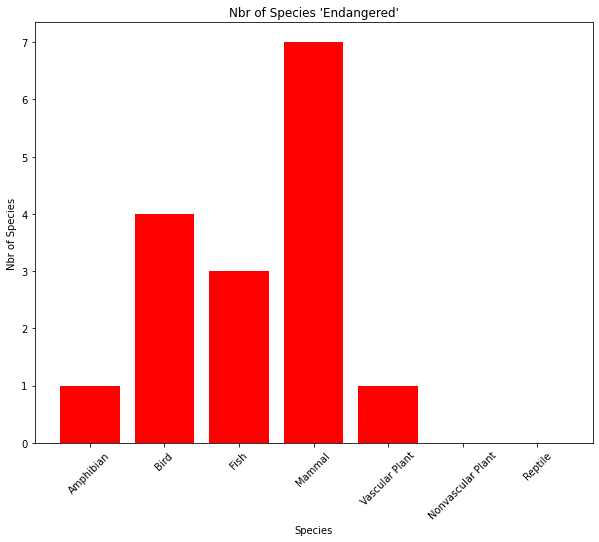

In [ ]:
#@title Code: Are certain types of species more likely to be endangered?
totalBySpecies = gridDF[gridDF.index == 'Endangered'].sum()

x= totalBySpecies.index.values
y = totalBySpecies.values
fig, ax = plt.subplots(figsize=(10,8))
plt.bar(x, y, color='red')
plt.xticks(rotation=45)
plt.title("Nbr of Species 'Endangered'")
plt.xlabel("Species")
plt.ylabel("Nbr of Species")

plt.gcf().subplots_adjust(bottom=0.15)

fig = plt.gcf()
plt.draw()
fig.savefig("nbrSpecies_per_category_for_stat_Endangered.png", format="png")
plt.show()

## Are the differences between species and their conservation status significant?

<Figure size 864x576 with 0 Axes>

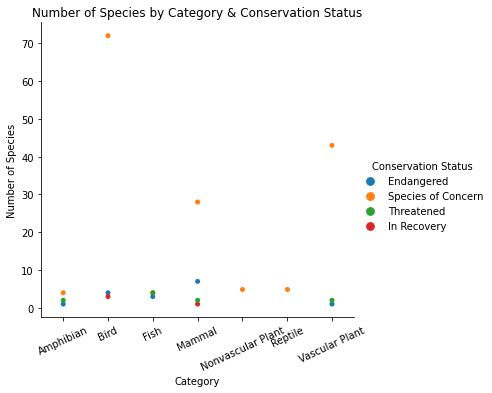

In [ ]:
#@title Code: Are the difference between species and their conservation status significant?
#Count conserversation status by scientific name
grouped_multiple = df.groupby(['category', 'conservation_status']).agg({'conservation_status': ['count']})
#Without this line we don't get the unique() method
grouped_multiple.columns = ['nbrCatConvStat']
grouped_multiple = grouped_multiple.reset_index()

fig, ax = plt.subplots(figsize=(12,8))
plt.clf()
ax = sns.catplot(data = grouped_multiple, x='category', y='nbrCatConvStat', hue='conservation_status', jitter=False)
plt.xticks(rotation=25)
plt.xlabel("Category")
plt.ylabel("Number of Species")
plt.title("Number of Species by Category & Conservation Status")
ax._legend.set_title("Conservation Status")

plt.gcf().subplots_adjust(bottom=0.15)


fig = plt.gcf()
plt.draw()
fig.savefig("nbrSpecies_per_category_by_status.png", format="png")
plt.show()

## Which species were spotted the most at each park?

In [ ]:
#@title Code: Which species were spotte the most at each park?

parkList = observationsDF_core.park_name.unique()

myDF = pd.DataFrame(index=parkList)

myDict = {}
for park in parkList:
  iLoc = observationsDF_core[observationsDF_core.park_name == park].observations.idxmax()
  k = park
  i = observationsDF_core.loc[iLoc].scientific_name
  v = observationsDF_core.loc[iLoc].observations
  #d['mynewkey'] = 'mynewvalue'
  myDict[k] = [i,v]

#print(myDict)

for i in myDict.items():
  print(i[0]+": "+i[1][0]+" = "+str(i[1][1])+" observations.")  

Great Smoky Mountains National Park: Sonchus asper ssp. asper = 147 observations.
Yosemite National Park: Ivesia shockleyi var. shockleyi = 223 observations.
Bryce National Park: Valerianella radiata = 176 observations.
Yellowstone National Park: Lycopodium tristachyum = 321 observations.


#Conclusion
* What is the distribution of conservation_status for animals?
  * **Answer**: The data are not normally distributed. They are however,  highly concentrated on the status "Series of Concern". However, within this conservation status we see that the data is more distributed across the seven categories of species with "Bird", "Mammal", and "Vascular Plant" making the top three, resepctively.
* Are certain types of species more likely to be endangered?
  * **Answer**: Yes, the category "Mammal" has the most number of species classified as "Endangered"
* Are the differences between species and their conservation status significant?
  * Observation of question: this question lends itself to calculate the number of "scientific_name" per "category". However, unless I am mistaken, a "category" is not a species, but type of species. In other words "Cains lupus" is a species of type "Mammal". If the question were to simply be answered in terms of species ("scientific_name") per "conservation_status" we would simply see one species per "conservation_status" as the status is not differentiate per park. This would not be very interesting. We can therefore use the data from the previous question, but will have to add the conservation status "In Recovery" back in.
  * **Answer**: Yes for the categories of "Bird", "Mammal", and "Vascular Plant". The other categories do not display significant differences.
* Which species were spotted the most at each park?
  * **Answer**:
    * Great Smoky Mountains National Park: Sonchus asper ssp. asper = 147 observations.
    * Yosemite National Park: Ivesia shockleyi var. shockleyi = 223 observations.
    * Bryce National Park: Valerianella radiata = 176 observations
    * Yellowstone National Park: Lycopodium tristachyum = 321 observations.